## K-Means Clustering

### Overview
K-Means is an **unsupervised machine learning algorithm** used for clustering data into groups based on similarity. It aims to partition the dataset into *K* distinct, non-overlapping clusters where each data point belongs to the cluster with the nearest mean (centroid).

### How It Works
1. **Choose the number of clusters (K).**
2. **Initialize centroids** randomly within the data space.
3. **Assign points** to the nearest centroid based on distance (commonly Euclidean distance).
4. **Recalculate centroids** as the mean of points in each cluster.
5. **Repeat** steps 3–4 until centroids stabilize (no or minimal movement).

### Objective Function
K-Means minimizes the *within-cluster sum of squares (WCSS)*:

$$J = \sum_{i=1}^{K} \sum_{x \in C_i} \|x - \mu_i\|^2$$

where:
- $K$: number of clusters
- $C_i$: cluster $i$
- $\mu_i$: centroid of cluster $i$
```


```
Inline: $x = \mu_i$

Display:
$$J = \sum_{i=1}^{K} \sum_{x \in C_i} \|x - \mu_i\|^2$$


### Use Cases
- Customer segmentation  
- Image compression  
- Document clustering  
- Anomaly 

---
#### Python Example:

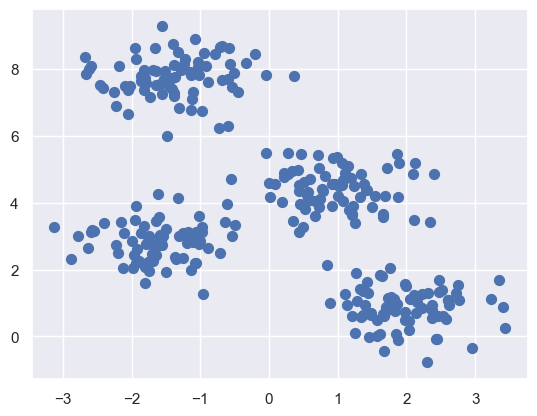

In [ ]:
f

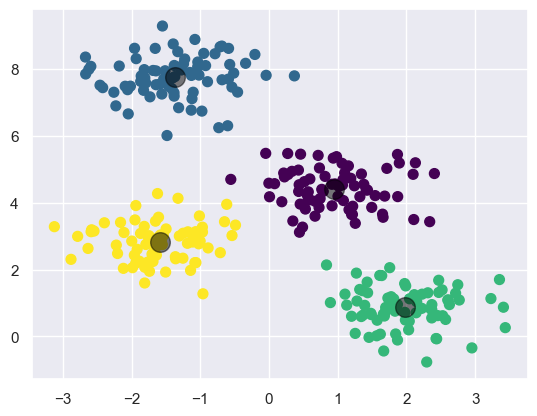

In [ ]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.labels_  

# Custom K-Means function 
import numpy as np
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2. assign label based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 3. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 4. check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels  

# Plot results
centers, labels = find_clusters(X, 4)
plt.scatter(X[:,0], X[:,1], c=labels, s=50, cmap="viridis")
plt.scatter(centers[:,0], centers[:,1], c="black", s=200, alpha=0.5)
plt.show()



### Key Learnings
- **Synthetic blobs**: 300 points, 4 centers, `cluster_std=0.60` for tight clusters
- **Scikit-learn**: Uses `labels_` property, modern imports
- **Custom algo**: Iterative center updates with convergence check
- **Perfect match**: Both recover true clustering on ideal dataset